# FFT Visualizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined, sim_oscillation
from neurodsp.utils import create_times, set_random_seed

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import local code
from code.gif import clear_output, _gif_plot_output
from code.measures import decompose_fft
from code.plts import plot_sines, plot_recomb, plot_phases, plot_powers

## Settings

In [4]:
# Set random seed
set_random_seed(505)

## Build Functions

In [5]:
def build_sines(sines, n_build=np.inf, sleep=0.05):
    """Build the sine wave plot (animated)."""
    
    for ind in range(min(sines.shape[0], n_build)):
        
        clear_output(wait=True)
        plot_sines(sines[0:ind, :])
        _gif_plot_output(plt.gcf(), False, ind, sleep=sleep)

In [6]:
def build_recomb(sines, data, n_build=np.inf, sleep=0.05):
    """Build the recombined wave plot (animated)."""
    
    for ind in range(min(sines.shape[0], n_build)):
        
        clear_output(wait=True)
        plot_recomb(sines[0:ind, :], data)
        _gif_plot_output(plt.gcf(), False, ind, sleep=sleep)

In [7]:
def build_phases(phases, n_build=np.inf, sleep=0.05):
    """Build the phase plot (animated)."""
    
    for ind in range(min(len(phases), n_build)):
        
        clear_output(wait=True)
        plot_phases(phases[0:ind])
        _gif_plot_output(plt.gcf(), False, ind, sleep=sleep)

In [8]:
def build_powers(freqs, powers, n_build=np.inf, sleep=0.05):
    """Build the powers plot (animated)."""
    
    for ind in range(min(len(phases), n_build)):
        
        clear_output(wait=True)
        plot_powers(freqs[0:ind], powers[0:ind])
        _gif_plot_output(plt.gcf(), False, ind, sleep=sleep)

In [9]:
def build_params(freqs, phases, powers, n_build=np.inf, sleep=0.05):
    """Build param plots together."""

    for ind in range(min(n_build, len(phases))):

        clear_output(wait=True)

        fig = plt.figure()
        ax1 = fig.add_axes([0, 0.0, 0.5, 0.5]) 
        ax2 = fig.add_axes([0, 0.6, 0.5, 0.5], polar=True)
    
        plot_powers(freqs[0:ind], powers[0:ind], ax=ax1)
        plot_phases(phases[0:ind], ax=ax2)
        _gif_plot_output(fig, False, ind, sleep=sleep)

In [10]:
def build_sigs(sines, data, n_build=np.inf, sleep=0.05):
    """Build signal plots together."""
    
    for ind in range(min(n_build, sines.shape[0])):

        clear_output(wait=True)

        fig = plt.figure()
        ax1 = fig.add_axes([0.0, 0.6, 1.3, 0.5])
        ax2 = fig.add_axes([0.0, 0.0, 1.3, 0.5])

        plot_sines(sines[0:ind, :], ax=ax1)
        plot_recomb(sines[0:ind, :], data, ax=ax2)
        _gif_plot_output(fig, False, ind, sleep=sleep)

In [11]:
def make_axes():
    """Make axes for combined plot.
    
    Notes:
    Placement definitions: Left, Bottom, Width, Height
    """
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.0, 0.6, 1.3, 0.5])
    ax2 = fig.add_axes([0.0, 0.0, 1.3, 0.5])
    ax3 = fig.add_axes([1.5, 0.0, 0.5, 0.5]) 
    ax4 = fig.add_axes([1.5, 0.6, 0.5, 0.5], polar=True)
    
    return fig, [ax1, ax2, ax3, ax4]


def build_all(sines, freqs, phases, powers, n_build=np.inf,
              sleep=0.05, save=False, label='01_fft_pe'):
    """Build all plots together."""

    for ind in range(min(n_build, sines.shape[0])):

        clear_output(wait=True)

        fig, axes = make_axes()

        plot_sines(sines[0:ind, :], ax=axes[0])
        plot_recomb(sines[0:ind, :], data, ax=axes[1])
        plot_powers(freqs[0:ind], powers[0:ind], log_powers=True, ax=axes[2])
        plot_phases(phases[0:ind], ax=axes[3])
        
        _gif_plot_output(fig, save, ind, label=label, sleep=sleep)

## Simulate Data

In [12]:
fs = 1000
n_seconds = 100
comps = {'sim_powerlaw' : {'exponent' : -1.75, 'f_range' : (1.4, 75)}, 
         'sim_bursty_oscillation' : {'freq' : 10, 'leave_burst' : 0.4}}
comp_vars = [1, 1]

times = create_times(n_seconds, fs)

sig = sim_combined(n_seconds, fs, comps, comp_vars)

### Test

In [13]:
data = sig[:1000]

In [14]:
sines, freqs, phases, powers = decompose_fft(data)

### Plot individual builds

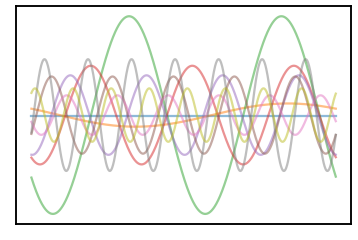

In [15]:
build_sines(sines, n_build=10)

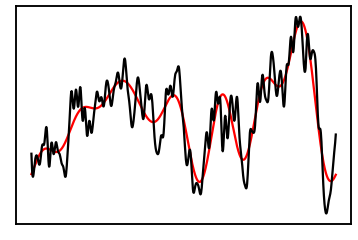

In [16]:
build_recomb(sines, data, n_build=10)

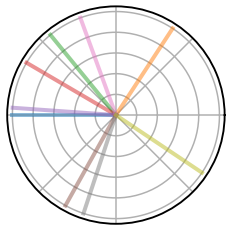

In [17]:
build_phases(phases, n_build=10)

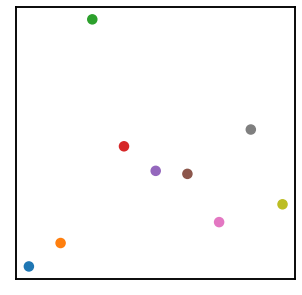

In [18]:
build_powers(freqs, powers, n_build=10)

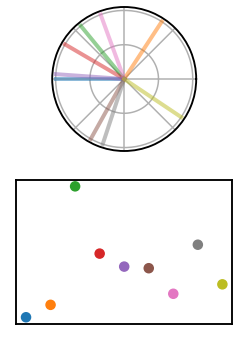

In [19]:
build_params(freqs, phases, powers, n_build=10)

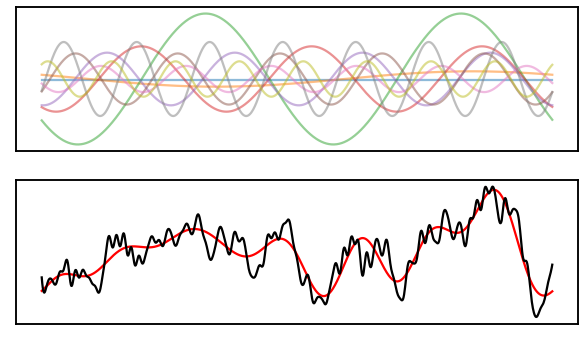

In [20]:
build_sigs(sines, data, n_build=10)

## Apply it!

In [21]:
data = sig[0:1000]
sines, freqs, phases, powers = decompose_fft(data)

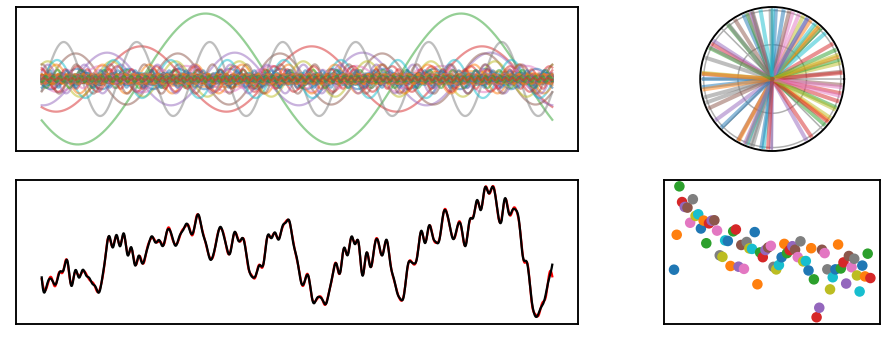

In [22]:
build_all(sines, freqs, phases, powers, n_build=75, save=False)

In [23]:
data = sig[1000:2000]
sines, freqs, phases, powers = decompose_fft(data)

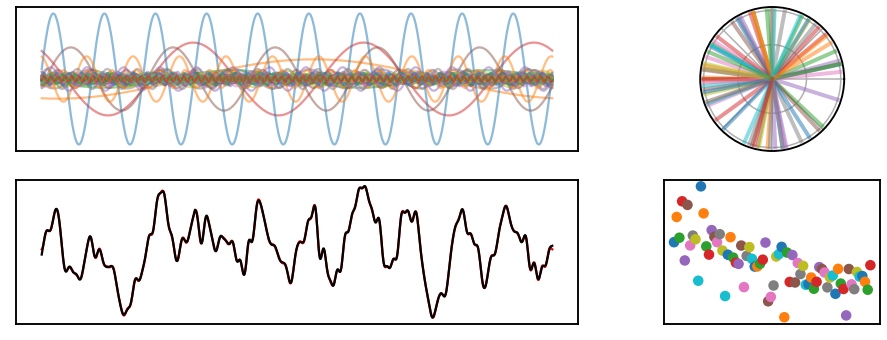

In [24]:
build_all(sines, freqs, phases, powers, n_build=75, save=False)

## Explore on simulated waves

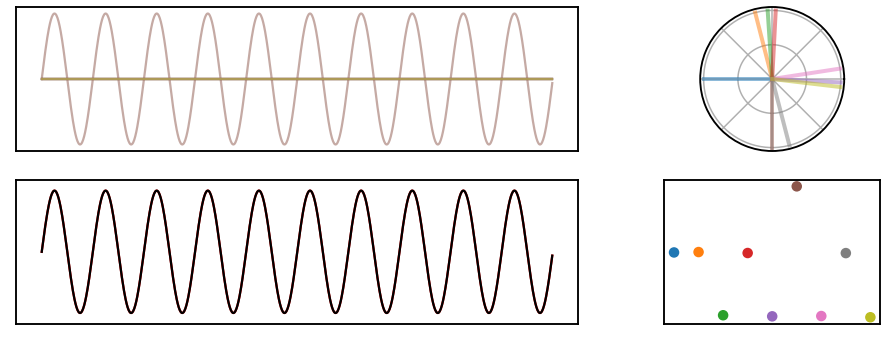

In [25]:
osc1 = sim_oscillation(1, 1000, 10, cycle='sine')
data = osc1[:1000]
sines, freqs, phases, powers = decompose_fft(data, threshold=0.0)
build_all(sines, freqs, phases, powers, n_build=10)

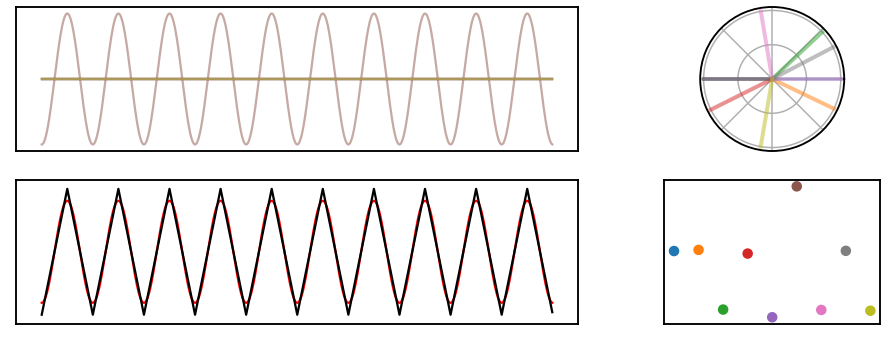

In [26]:
osc2 = sim_oscillation(1, 1000, 10, cycle='sawtooth', width=0.5)
data = osc2[:1000]
sines, freqs, phases, powers = decompose_fft(data, threshold=0.0)
build_all(sines, freqs, phases, powers, n_build=10)